# Values of the variables

C = drag coefficient of sphere = 0.5

rho = density of air = 1.2 kg/m3

angular velocity w = 20

v0 = launch velocity = 30 m/s

theta = launch angle = 30 degrees

Magnus Force Fm = s (w x v) 



In [1]:
#GlowScript 2.7 VPython
#this prevents accidental user scrolling
#scene.userzoom=False
from vpython import *
#gravitational field vector
g=vector(0,-9.8,0)

#these two lines make the ground 
ground=box(pos=vector(0,-1.5,0), size=vector(13,.2,20), color=color.green)
line=box(pos=vector(0,-1.49,0), size=vector(.1,.2,20), color=color.white)

#the soccer ball
ball1=sphere(pos=vector(0,-1.4,9), radius=.105, color=color.red, make_trail=True)
ball2=sphere(pos=ball1.pos, radius=ball1.radius, color=color.yellow, make_trail=True)
ball3=sphere(pos=ball1.pos, radius=ball1.radius, color=color.blue, make_trail=True)


#density of soccer ball
rhosoccer=74*1.20 #74 times the density of air
#calculate the mass of the soccer ball
ball1.m=(rhosoccer*4*pi*ball1.radius**3)/3

#Angular velocity of ball 
ball1.omega=vector(0,20,0)
ball2.omega=vector(0,0,0)
ball3.omega=vector(0,-20,0)



#launch speed in m/s
v0=10
#launch angle
theta = 30*pi/180

#initial velocity vector
ball1.v=v0*vector(0.15,sin(theta),-cos(theta)) #launch angle starting point is taken (components)
ball2.v=v0*vector(0.15,sin(theta),-cos(theta))
ball3.v=v0*vector(0.15,sin(theta),-cos(theta))

#initial momentum vector
ball1.p=ball1.m*ball1.v

ball2.p=ball1.p
ball2.m=ball1.m

ball3.p=ball1.p
ball3.m=ball1.m

rho=1.20 #density of air

C=0.47 #the drag coefficient for a sphere

A = pi*ball1.radius**2 # Cross section area
s=0.03  #this is a magnus force constant

t=0
dt=0.0001

time = []
ball_x = []
ball2_x = []

x1_val=[]
x2_val=[]
x3_val=[]
z1_val=[]
z2_val=[]
z3_val=[]

while ball2.pos.y>=-1.4 and ball2.pos.y<8:
    rate(550) #vpython
    #calculate the velocity- it makes it easier to calc air drag
    ball1.v=ball1.p/ball1.m
   #calculate the force
   #note that to square velocity, must first find magnitude
   #in order to make it a vector, I multiply by unit vector for v
    F1=ball1.m*g-.5*rho*A*C*norm(ball1.v)*mag(ball1.v)**2+s*cross(ball1.omega,ball1.v)
    F2=ball2.m*g-.5*rho*A*C*norm(ball2.v)*mag(ball2.v)**2+s*cross(ball2.omega,ball2.v)
    F3=ball3.m*g-.5*rho*A*C*norm(ball3.v)*mag(ball3.v)**2+s*cross(ball3.omega,ball3.v)
    
    #update the momentum
    ball1.p=ball1.p+F1*dt
    ball2.p=ball2.p+F2*dt
    ball3.p=ball3.p+F3*dt
    #update the position
    ball1.pos=ball1.pos+ball1.p*dt/ball1.m
    ball2.pos=ball2.pos+ball2.p*dt/ball2.m
    ball3.pos=ball3.pos+ball3.p*dt/ball3.m
    #update the time
    t=t+dt
    x1_val.append(ball1.pos.x)
    x2_val.append(ball2.pos.x)
    x3_val.append(ball3.pos.x)
    z1_val.append(ball1.pos.z)
    z2_val.append(ball2.pos.z)
    z3_val.append(ball3.pos.z)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'z (cm)')

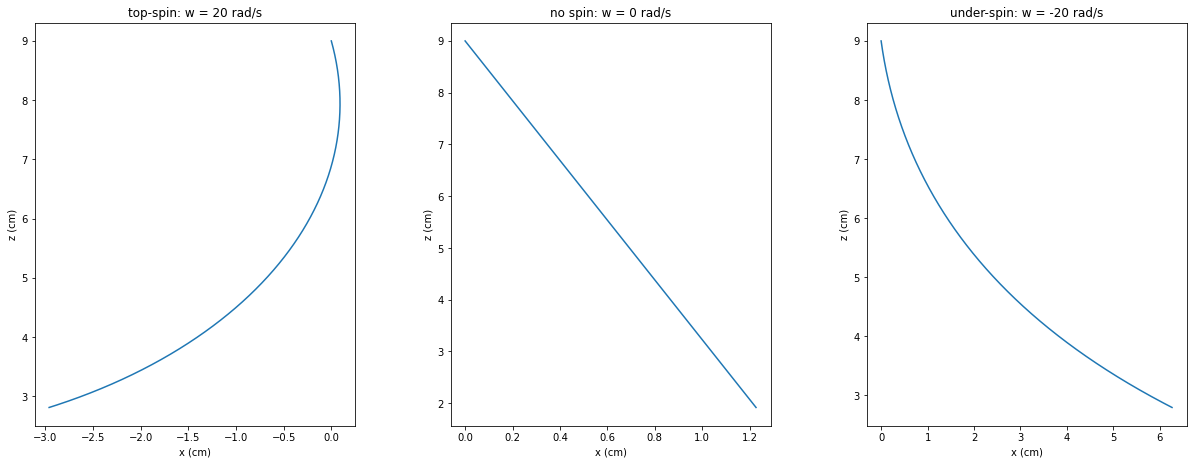

In [2]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(1, 3,figsize=(20, 7))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

axis[0].plot(x1_val, z1_val)
axis[0].set_title("top-spin: w = 20 rad/s")

axis[1].plot(x2_val, z2_val)
axis[1].set_title("no spin: w = 0 rad/s")

axis[2].plot(x3_val, z3_val)
axis[2].set_title("under-spin: w = -20 rad/s")

axis[0].set_xlabel('x (cm)')
axis[0].set_ylabel('z (cm)')

axis[1].set_xlabel('x (cm)')
axis[1].set_ylabel('z (cm)')

axis[2].set_xlabel('x (cm)')
axis[2].set_ylabel('z (cm)')

In [3]:
import pandas as pd
df = pd.DataFrame(data={'x1 (ball 1)': x1_val, 
                        'x2 (ball 2)': x2_val, 
                        'x3 (ball 3)': x3_val, 
                        'z1 (ball1)': z1_val, 
                        'z2 (ball2)': z2_val, 
                        'z3 (ball3)': z3_val })

NumExpr defaulting to 8 threads.


In [4]:
df

,x1 (ball 1),x2 (ball 2),x3 (ball 3),z1 (ball1),z2 (ball2),z3 (ball3)
0,0.000150,0.000150,0.000150,8.999134,8.999134,8.999134
1,0.000300,0.000300,0.000300,8.998268,8.998268,8.998268
2,0.000449,0.000450,0.000451,8.997402,8.997402,8.997402
3,0.000599,0.000600,0.000601,8.996536,8.996536,8.996536
4,0.000748,0.000750,0.000752,8.995670,8.995670,8.995670
...,...,...,...,...,...,...
9130,-2.957815,1.226205,6.257348,2.814634,1.920502,2.791921
9131,-2.958473,1.226324,6.258569,2.814299,1.919817,2.791428
9132,-2.959131,1.226442,6.259789,2.813966,1.919133,2.790934
9133,-2.959789,1.226561,6.261010,2.813632,1.918448,2.790440
